In [13]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

#market_data_df.info()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler()

market_data_scaled.fit(market_data_df)

market_data_normalized = market_data_scaled.transform(market_data_df)

In [12]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(market_data_normalized, columns=market_data_df.columns)

# Copy the crypto names from the original data
df_scaled["Crypto Names"] = market_data_df.index

# Set the coinid column as index
df_scaled = df_scaled.set_index("Crypto Names")

# Display sample data
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
Crypto Names,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

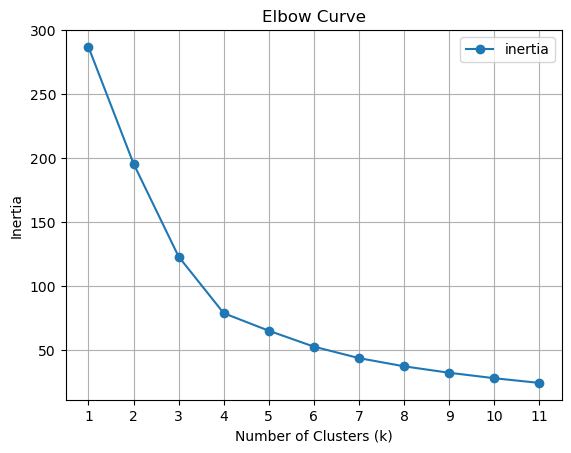

In [15]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.plot(x='k', y='inertia', marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [18]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**

In [17]:
print("The best value for k seems to be 4, where the inertia starts to level off")

The best value for k seems to be 4, where the inertia starts to level off


### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [19]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [20]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = model.predict(df_scaled)

# View the resulting array of cluster values.
print(clusters)

[3 3 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 0 3 1 1 2
 1 1 1 1]


In [22]:
# Create a copy of the DataFrame
df_predictions = df_scaled.copy()

In [23]:
# Add a new column to the DataFrame with the predicted clusters
df_predictions["Cluster"] = clusters

# Display sample data
df_predictions

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
Crypto Names,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,3
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,3
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,3
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,3


<Axes: title={'center': 'Cryptocurrency Clusters'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

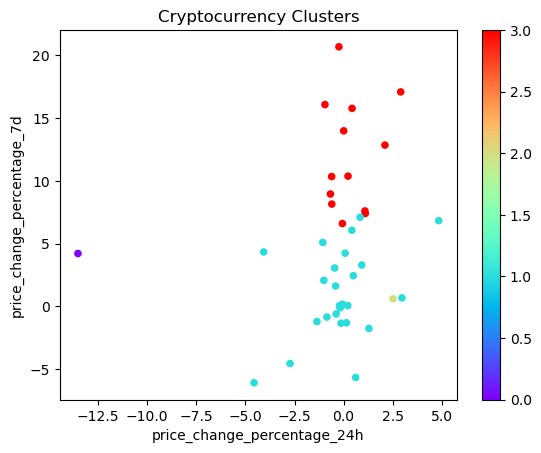

In [31]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

scatter_plot = market_data_df.plot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c=clusters, 
    colormap="rainbow", 
    title="Cryptocurrency Clusters")

scatter_plot

### Optimize Clusters with Principal Component Analysis.

In [32]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [33]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(df_scaled)

# View the first five rows of the DataFrame. 
pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [38]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
#explained_variance


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [41]:
total_explained_variance = sum(explained_variance)
total_explained_variance
print("The total explained variance of the three principal components is", total_explained_variance)

The total explained variance of the three principal components is 0.8950316570309842


In [69]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_columns = ["PCA1", "PCA2", "PCA3"]
pca_df = pd.DataFrame(data=pca_data, columns=pca_columns, index=market_data_df.index)

# Copy the crypto names from the original data
pca_df["Crypto_Name"] = market_data_df.index

# Set the coinid column as index
#pca_df.info()
pca_df.set_index(market_data_df.index)

# Display sample data
print(pca_df.head())

                  PCA1      PCA2      PCA3   Crypto_Name
coin_id                                                 
bitcoin      -0.600667  0.842760  0.461595       bitcoin
ethereum     -0.458261  0.458466  0.952877      ethereum
tether       -0.433070 -0.168126 -0.641752        tether
ripple       -0.471835 -0.222660 -0.479053        ripple
bitcoin-cash -1.157800  2.041209  1.859715  bitcoin-cash


### Find the Best Value for k Using the PCA Data

In [70]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
# 2. Fit the model to the data using PCA DataFrame.
    kmeans.fit(pca_data)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k_values": k_values, "inertia_values": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow)

   k_values  inertia_values
0         1      256.874086
1         2      165.901994
2         3       93.774626
3         4       49.665497
4         5       37.878747
5         6       27.618972
6         7       21.182776
7         8       17.389823
8         9       13.593650
9        10       10.559358


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

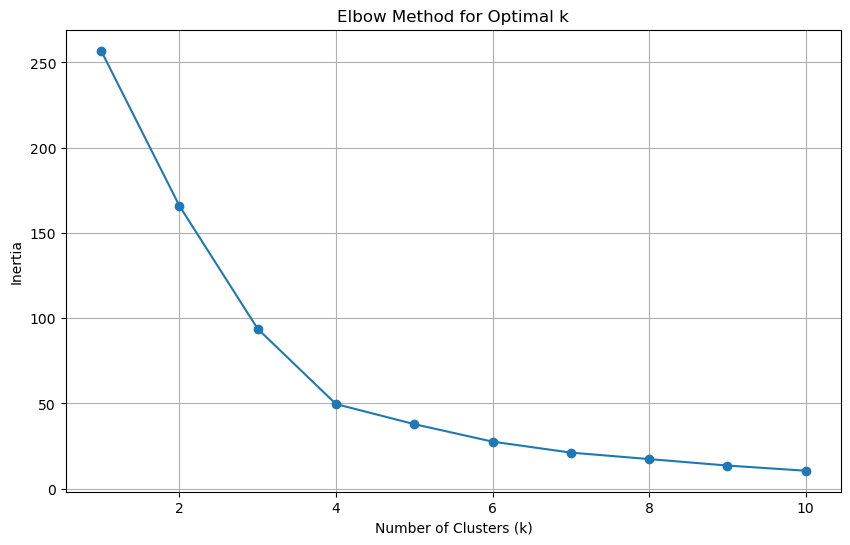

In [71]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow["k_values"], df_elbow["inertia_values"], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

In [72]:
print("The best value for k seems to be 4 again, similar to the value found using the original data.")

The best value for k seems to be 4 again, similar to the value found using the original data.


### Cluster Cryptocurrencies with K-means Using the PCA Data

In [78]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)


In [79]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_data)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [80]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = kmeans.predict(pca_data)

# Print the resulting array of cluster values.
print(predicted_clusters)


[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [99]:
# Create a copy of the DataFrame with the PCA data
df_pca_clusters = pca_df

# Add a new column to the DataFrame with the predicted clusters
df_pca_clusters["Cluster"] = predicted_clusters
#df_pca_clusters

# Display sample data
df_pca_clusters.head()

,PCA1,PCA2,PCA3,Crypto_Name,Cluster
coin_id,,,,,
bitcoin,-0.600667,0.842760,0.461595,bitcoin,0
ethereum,-0.458261,0.458466,0.952877,ethereum,0
tether,-0.433070,-0.168126,-0.641752,tether,3
ripple,-0.471835,-0.222660,-0.479053,ripple,3
bitcoin-cash,-1.157800,2.041209,1.859715,bitcoin-cash,0


In [102]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas

scatter_plot = df_pca_clusters.hvplot.scatter(x="PCA1", y="PCA2", c="Cluster", cmap='winter', title="PCA Scatter Plot")

scatter_plot

:Scatter   [PCA1]   (PCA2,Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [111]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=df_scaled.columns)

# Display the DataFrame showing the weights of each feature for each principal component
print(pca_component_weights)

ValueError: Shape of passed values is (7, 3), indices imply (7, 2)

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    